#**Rainfall Prediction Using Machine Learning Classifiers**

##📝 Problem Statement

- The dataset contains daily weather observations from multiple locations across Australia. It includes variables such as temperature, rainfall, humidity, wind speed, and atmospheric pressure. One of the key variables, RainTomorrow, indicates whether it will rain the next day — a crucial binary classification target for weather prediction.

##🎯 Goal

- The main goal is to build a predictive model that accurately forecasts whether it will rain tomorrow (RainTomorrow) based on the weather conditions observed today. This involves:

    - Cleaning and preprocessing the data

    - Exploring and analyzing weather patterns

    - Engineering features that influence rainfall prediction

    - Training and evaluating machine learning models for classification

##Libraries

In [1]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

##Data

https://www.kaggle.com/datasets/gauravduttakiit/weather-in-aus

In [2]:
rain=pd.read_csv("/content/weatherAUS.csv")
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,20-06-2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


##Understanding the Data

In [3]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
# shape of the data
rain.shape

(142193, 24)

In [5]:
# Displays first 10 rows
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,06-12-2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,07-12-2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,08-12-2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,09-12-2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,10-12-2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [6]:
rain.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,20-06-2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [7]:
rain.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
125425,18-12-2013,Walpole,16.0,21.6,0.0,NaN,NaN,SE,31.0,S,...,63.0,1014.3,1015.7,NaN,NaN,18.2,19.3,No,0.0,No
128038,26-04-2012,Hobart,8.6,16.1,0.0,1.8,7.0,SW,43.0,N,...,50.0,1017.2,1016.2,NaN,NaN,12.8,13.4,No,0.4,No
48732,13-09-2011,Tuggeranong,-3.7,14.7,0.0,NaN,NaN,NW,41.0,WNW,...,47.0,1024.8,1020.8,NaN,NaN,6.1,13.3,No,0.0,No
31340,20-05-2013,Sydney,10.1,20.7,0.0,4.0,8.5,W,44.0,W,...,37.0,1018.7,1014.7,4.0,3.0,11.3,19.6,No,0.0,No
91147,21-10-2009,Townsville,17.0,29.6,0.0,11.8,12.0,NE,46.0,ESE,...,47.0,1021.8,1017.5,1.0,1.0,27.4,27.4,No,0.4,No


In [8]:
print("The features of the Dataset are:")
features = len(rain.columns)
features_list = [feature for feature in rain.columns]
for feature in features_list:
  print(feature)

The features of the Dataset are:
Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


**FEATURES**

- Location - Name of the city from Australia.
- MinTemp - The Minimum temperature during a particular day. (degree Celsius)
- MaxTemp - The maximum temperature during a particular day. (degree Celsius)
- Rainfall - Rainfall during a particular day. (millimeters)
- Evaporation - Evaporation during a particular day. (millimeters)
- Sunshine - Bright sunshine during a particular day. (hours)
- WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)
- WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)
- WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)
- WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)
- WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
- WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
- Humidity9am - The humidity of the wind at 9 am. (percent)
- Humidity3pm - The humidity of the wind at 3 pm. (percent)
- Pressure9am - Atmospheric pressure at 9 am. (hectopascals)
- Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)
- Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)
- Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)
- Temp9am - The temperature at 9 am. (degree Celsius)
- Temp3pm - The temperature at 3 pm. (degree Celsius)
- RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
- RISK_MM - The amount of rain (in millimeters) that is expected to fall the next day.
- RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

In [9]:
rain.describe(include=['O']).T

,count,unique,top,freq
Date,142193,3436,23-06-2017,49
Location,142193,49,Canberra,3418
WindGustDir,132863,16,W,9780
WindDir9am,132180,16,N,11393
WindDir3pm,138415,16,SE,10663
RainToday,140787,2,No,109332
RainTomorrow,142193,2,No,110316


In [10]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

##Data Visualization

###Categorical Column

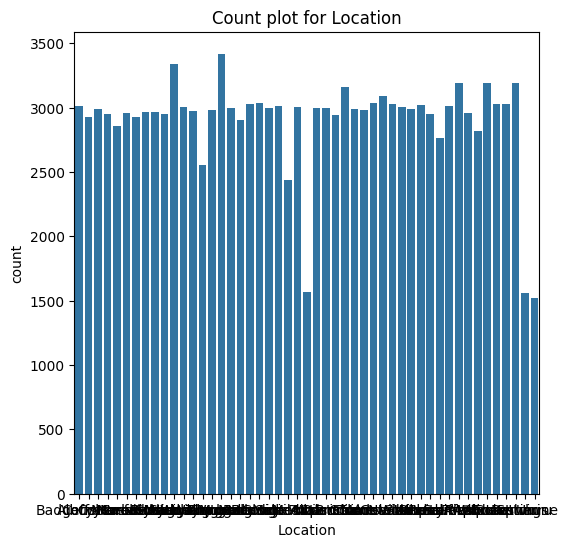

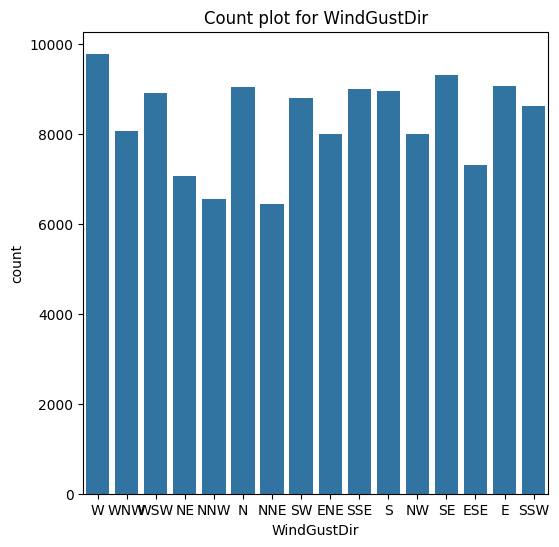

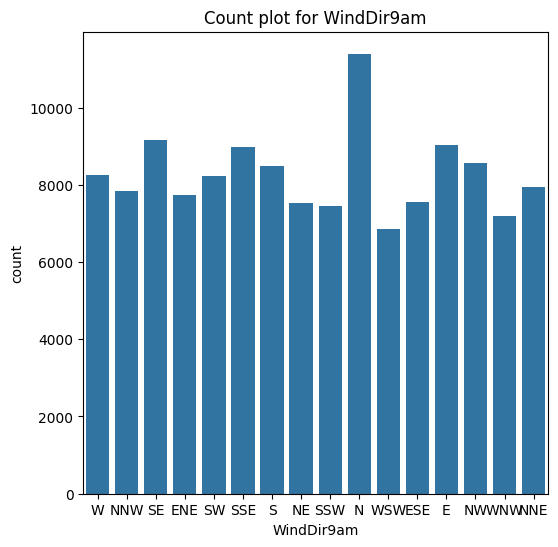

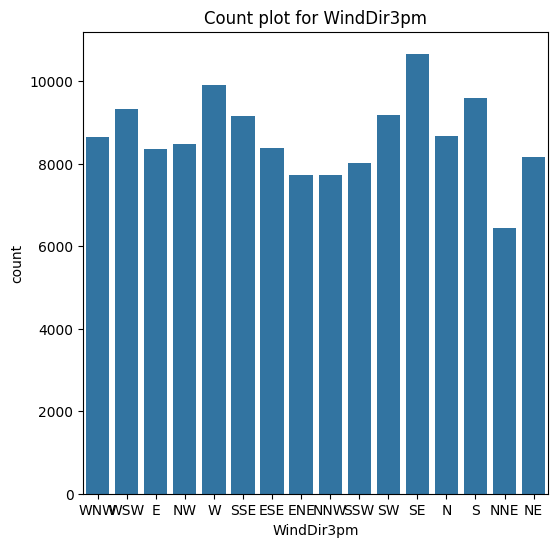

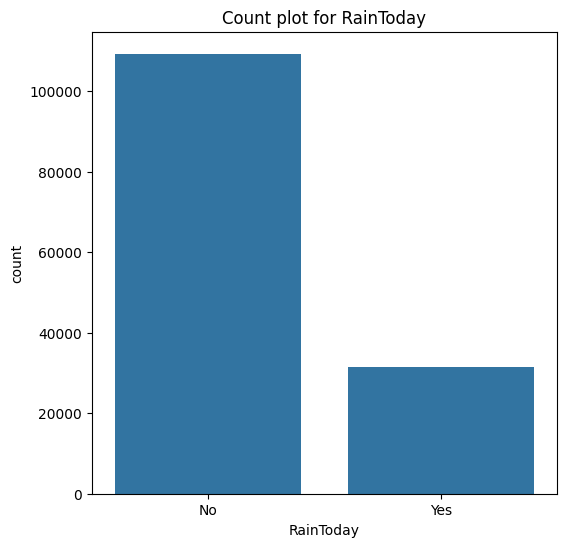

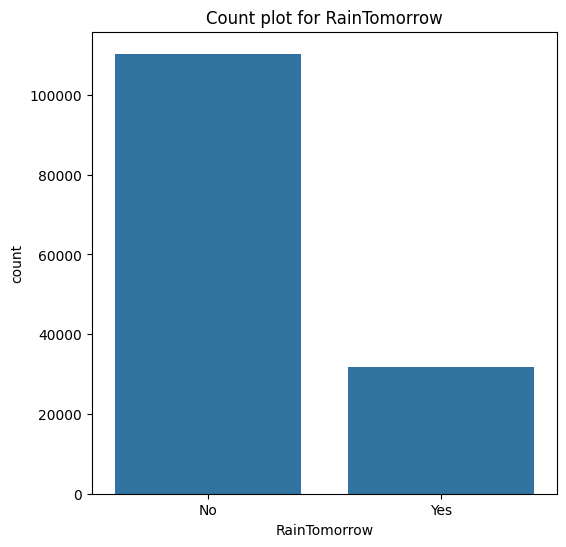

In [ ]:
categorical_columns = rain.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]: # Skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=rain, x=col)
    plt.title(f"Count plot for {col}")
    plt.show()

🔍 **Inference**

- In the feature "Rain Tomorrow", the number of days labeled "No" (it will not rain tomorrow) is significantly higher than those labeled "Yes" (it will rain tomorrow).And the feature "Rain Today" also.

- This is a class imbalance problem.

-  trained on this data might be biased towards predicting "No" more often.

-  like SMOTE, undersampling, or class weights adjustment should be considered to address this imbalance.

###Numerical Column

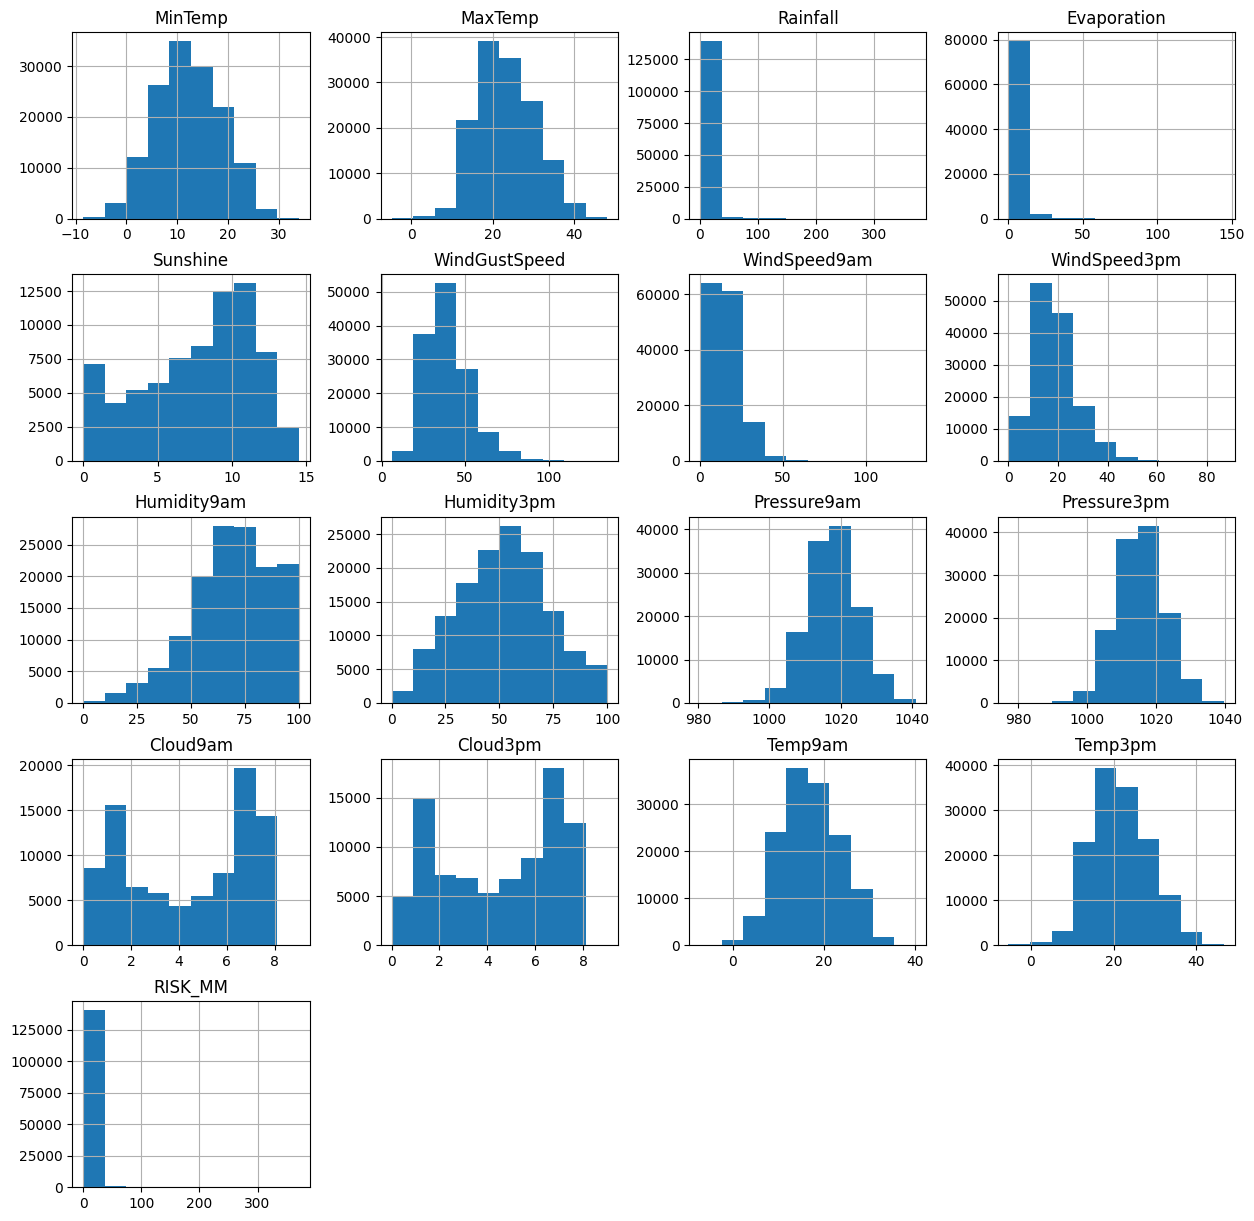

In [ ]:
rain.hist(figsize=(15,15))
plt.show()

🔍 **Inference**

- Most numerical features like temperature and pressure are normally distributed, while features like rainfall, evaporation, and wind speed are right-skewed, indicating rare extreme values. Cloud cover and sunshine show bimodal patterns, suggesting varying weather conditions. Skewed features may require transformation before modeling.

###Target Variable

<ipython-input-13-bf961c3e924f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp = sns.barplot(x='RainTomorrow', y='Rainfall', data=rain, palette='cool')


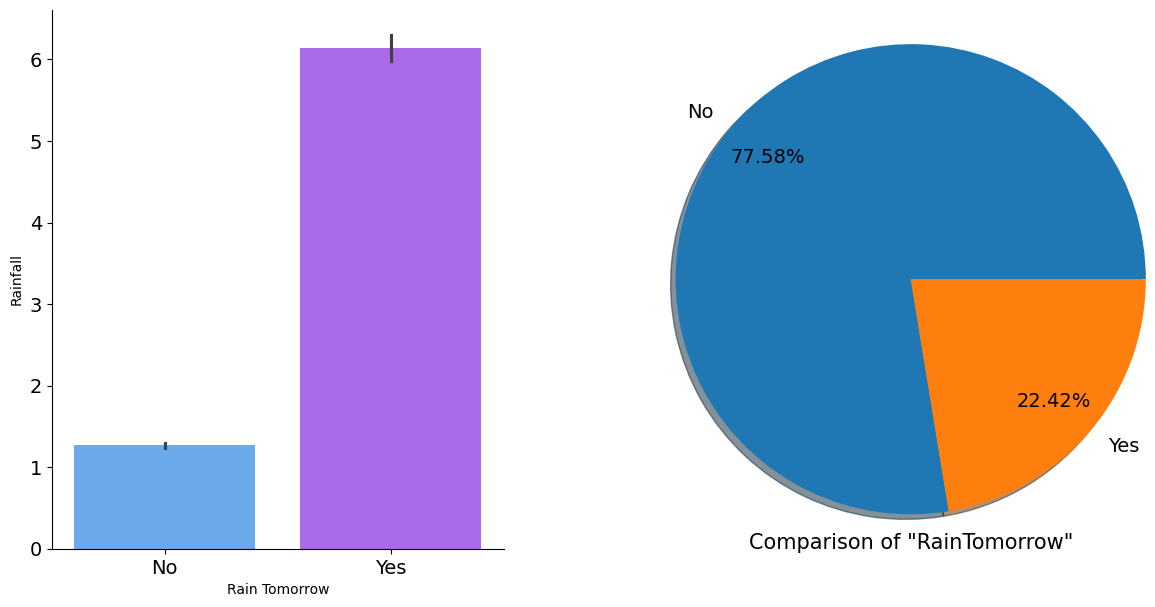

In [ ]:
# Checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.barplot(x='RainTomorrow', y='Rainfall', data=rain, palette='cool')
ax1.set_xlabel("Rain Tomorrow")
ax1.set_ylabel("Rainfall")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
# pie plot
ax2 = plt.subplot(1,2,2)
plt.pie(x=rain['RainTomorrow'].value_counts(),
        labels=list(rain['RainTomorrow'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Comparison of "RainTomorrow"', fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

**BAR PLOT**

🔍 Inference:

- There is a clear difference in average rainfall between the two groups.

- More rainfall today is strongly associated with the possibility of rain tomorrow, suggesting that today’s rainfall is a good predictive feature for tomorrow’s rain.

**PIE CHART**

🔍 Inference:

- The dataset is imbalanced, with a majority of instances (about 78%) falling in the "No Rain Tomorrow" category.

- This imbalance should be considered when training models, as it can lead to biased predictions. Techniques like resampling, class weighting, or using appropriate evaluation metrics (e.g., F1-score, AUC) are recommended.

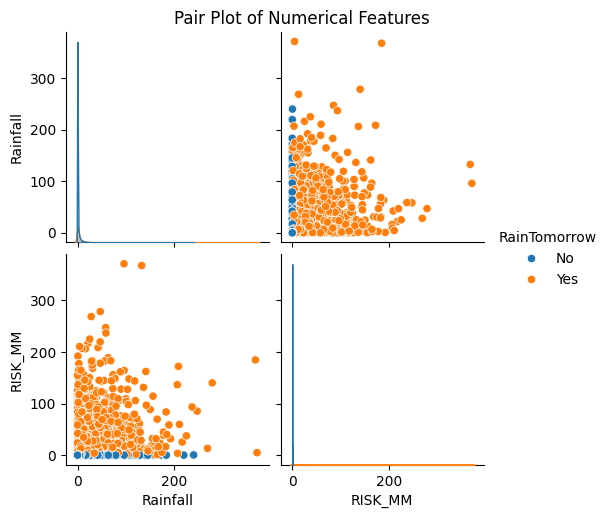

In [ ]:
sns.pairplot(rain[['Rainfall','RISK_MM','RainTomorrow']],hue='RainTomorrow')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

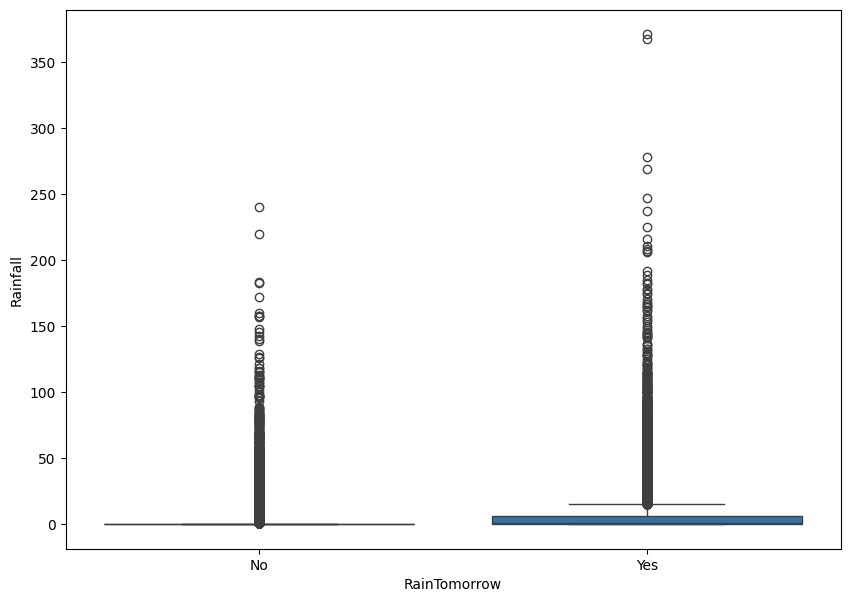

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rain,x='RainTomorrow', y='Rainfall')
plt.show()

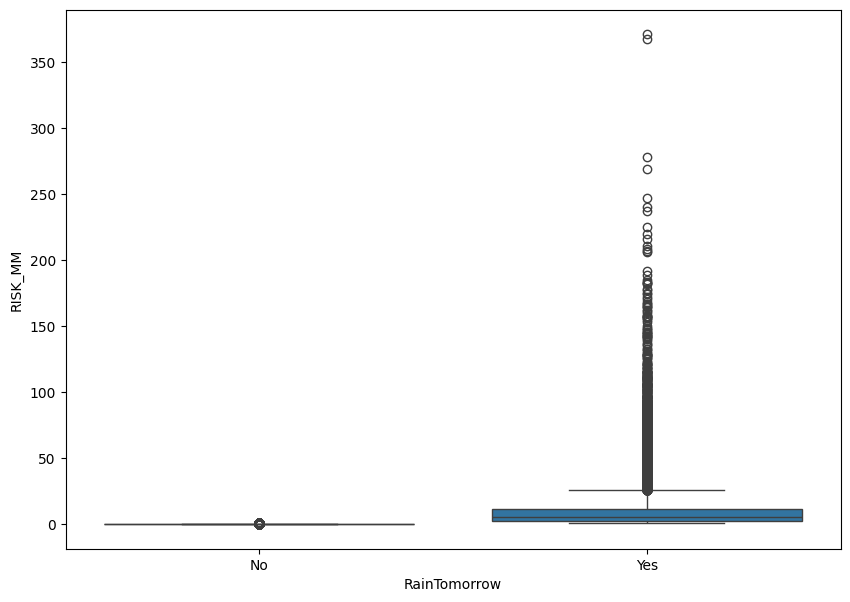

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rain,x='RainTomorrow', y='RISK_MM')
plt.show()

##Data Cleaning

###Handling Null/duplicates values

In [11]:
# Detecting duplicates
rain.duplicated().sum()

np.int64(0)

* No duplicates in this dataset

In [12]:
rain.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [13]:
#Columns with missing values
rain.isna().sum()[rain.isna().sum() != 0]

,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013
WindDir3pm,3778
WindSpeed9am,1348


In [14]:
# Calculate  the percentage of missing values and round to 2
(rain.isna().sum()/rain.shape[0]*100).round(2)

,0
Date,0.00
Location,0.00
MinTemp,0.45
MaxTemp,0.23
Rainfall,0.99
Evaporation,42.79
Sunshine,47.69
WindGustDir,6.56
WindGustSpeed,6.52
WindDir9am,7.04


Evaporation,Sunshine,Cloud9am and Cloud3pm contains many more null values. So drop this columns

In [15]:
rain.drop('Evaporation',axis='columns',inplace=True)
rain.drop('Sunshine',axis='columns',inplace=True)
rain.drop('Cloud9am',axis='columns',inplace=True)
rain.drop('Cloud3pm',axis='columns',inplace=True)

In [16]:
rain['MinTemp'].fillna(rain['MinTemp'].median(),inplace=True)
rain['MaxTemp'].fillna(rain['MaxTemp'].median(),inplace=True)
rain['Rainfall'].fillna(rain['Rainfall'].median(),inplace=True)
rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0],inplace=True)
rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].median(),inplace=True)
rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0],inplace=True)
rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0],inplace=True)
rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].median(),inplace=True)
rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].median(),inplace=True)
rain['Humidity9am'].fillna(rain['Humidity9am'].median(),inplace=True)
rain['Humidity3pm'].fillna(rain['Humidity3pm'].median(),inplace=True)
rain['Pressure9am'].fillna(rain['Pressure9am'].median(),inplace=True)
rain['Pressure3pm'].fillna(rain['Pressure3pm'].median(),inplace=True)
rain['Temp9am'].fillna(rain['Temp9am'].median(),inplace=True)
rain['Temp3pm'].fillna(rain['Temp3pm'].median(),inplace=True)
rain['RainToday'].fillna(rain['RainToday'].mode()[0],inplace=True)

<ipython-input-16-f23f6f33bea2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rain['MinTemp'].fillna(rain['MinTemp'].median(),inplace=True)
<ipython-input-16-f23f6f33bea2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [17]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

In [18]:
rain['Date'] = pd.to_datetime(rain['Date'], dayfirst=True)
rain['Day'] = rain['Date'].dt.day
rain['Month'] = rain['Date'].dt.month
rain['Year'] = rain['Date'].dt.year
rain.drop('Date', axis=1, inplace=True)
rain[['Day','Month','Year']]

,Day,Month,Year
0,1,12,2008
1,2,12,2008
2,3,12,2008
3,4,12,2008
4,5,12,2008
...,...,...,...
142188,20,6,2017
142189,21,6,2017
142190,22,6,2017
142191,23,6,2017


In [19]:
rain['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


###Encoding

####Ordinal Data

Many machine learning models, likedecision trees and regression models, relay on the relative order of numeric values. By manually assigning meaningful numbers, the model can better capture the relationship between the ordinal categories.

In [20]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RISK_MM        142193 non-nul

In [21]:
rain['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [22]:
rain['RainToday'].value_counts()

,count
RainToday,
No,110738
Yes,31455


In [23]:
rain['RainTomorrow']=rain['RainTomorrow'].map({'No':0,'Yes':1})
rain['RainToday']=rain['RainToday'].map({'No':0,'Yes':1})

In [24]:
rain['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,110316
1,31877


In [25]:
rain['RainToday'].value_counts()

,count
RainToday,
0,110738
1,31455


In [26]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  int64  
 17  RISK_MM        142193 non-nul

####Nominal Data

* Converting Categorical Feature Values to numerical values using Label Encoding.
* Label Encoding provides values from 1 to N.

In [27]:
rain['Location'] = LabelEncoder().fit_transform(rain['Location'])
rain['WindGustDir'] = LabelEncoder().fit_transform(rain['WindGustDir'])
rain['WindDir9am'] = LabelEncoder().fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = LabelEncoder().fit_transform(rain['WindDir3pm'])

In [28]:
rain['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,110316
1,31877


In [29]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  int64  
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  int64  
 7   WindDir3pm     142193 non-null  int64  
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  int64  
 17  RISK_MM        142193 non-nul

###Feature Engineering

In [30]:
rain['WindDir']=(rain['WindDir3pm']+rain['WindDir9am'])/2
rain.drop('WindDir3pm',axis='columns',inplace=True)
rain.drop('WindDir9am',axis='columns',inplace=True)

In [31]:
rain['WindSpeed']=(rain['WindSpeed9am']+rain['WindSpeed3pm'])/2
rain.drop('WindSpeed9am',axis='columns',inplace=True)
rain.drop('WindSpeed3pm',axis='columns',inplace=True)

In [32]:
rain['Humidity']=(rain['Humidity9am']+rain['Humidity3pm'])/2
rain.drop('Humidity9am',axis='columns',inplace=True)
rain.drop('Humidity3pm',axis='columns',inplace=True)

In [33]:
rain['Pressure']=(rain['Pressure9am']+rain['Pressure3pm'])/2
rain.drop('Pressure9am',axis='columns',inplace=True)
rain.drop('Pressure3pm',axis='columns',inplace=True)

In [34]:
rain['Temperature']=(rain['Temp9am']+rain['Temp3pm']+rain['MinTemp']+rain['MaxTemp'])/4
rain.drop('Temp9am',axis='columns',inplace=True)
rain.drop('Temp3pm',axis='columns',inplace=True)

In [35]:
rain.drop('MinTemp',axis='columns',inplace=True)
rain.drop('MaxTemp',axis='columns',inplace=True)

In [36]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   Rainfall       142193 non-null  float64
 2   WindGustDir    142193 non-null  int64  
 3   WindGustSpeed  142193 non-null  float64
 4   RainToday      142193 non-null  int64  
 5   RISK_MM        142193 non-null  float64
 6   RainTomorrow   142193 non-null  int64  
 7   Day            142193 non-null  int32  
 8   Month          142193 non-null  int32  
 9   Year           142193 non-null  int32  
 10  WindDir        142193 non-null  float64
 11  WindSpeed      142193 non-null  float64
 12  Humidity       142193 non-null  float64
 13  Pressure       142193 non-null  float64
 14  Temperature    142193 non-null  float64
dtypes: float64(8), int32(3), int64(4)
memory usage: 14.6 MB


##Data Transformation

###Skewed Data

####Histograms

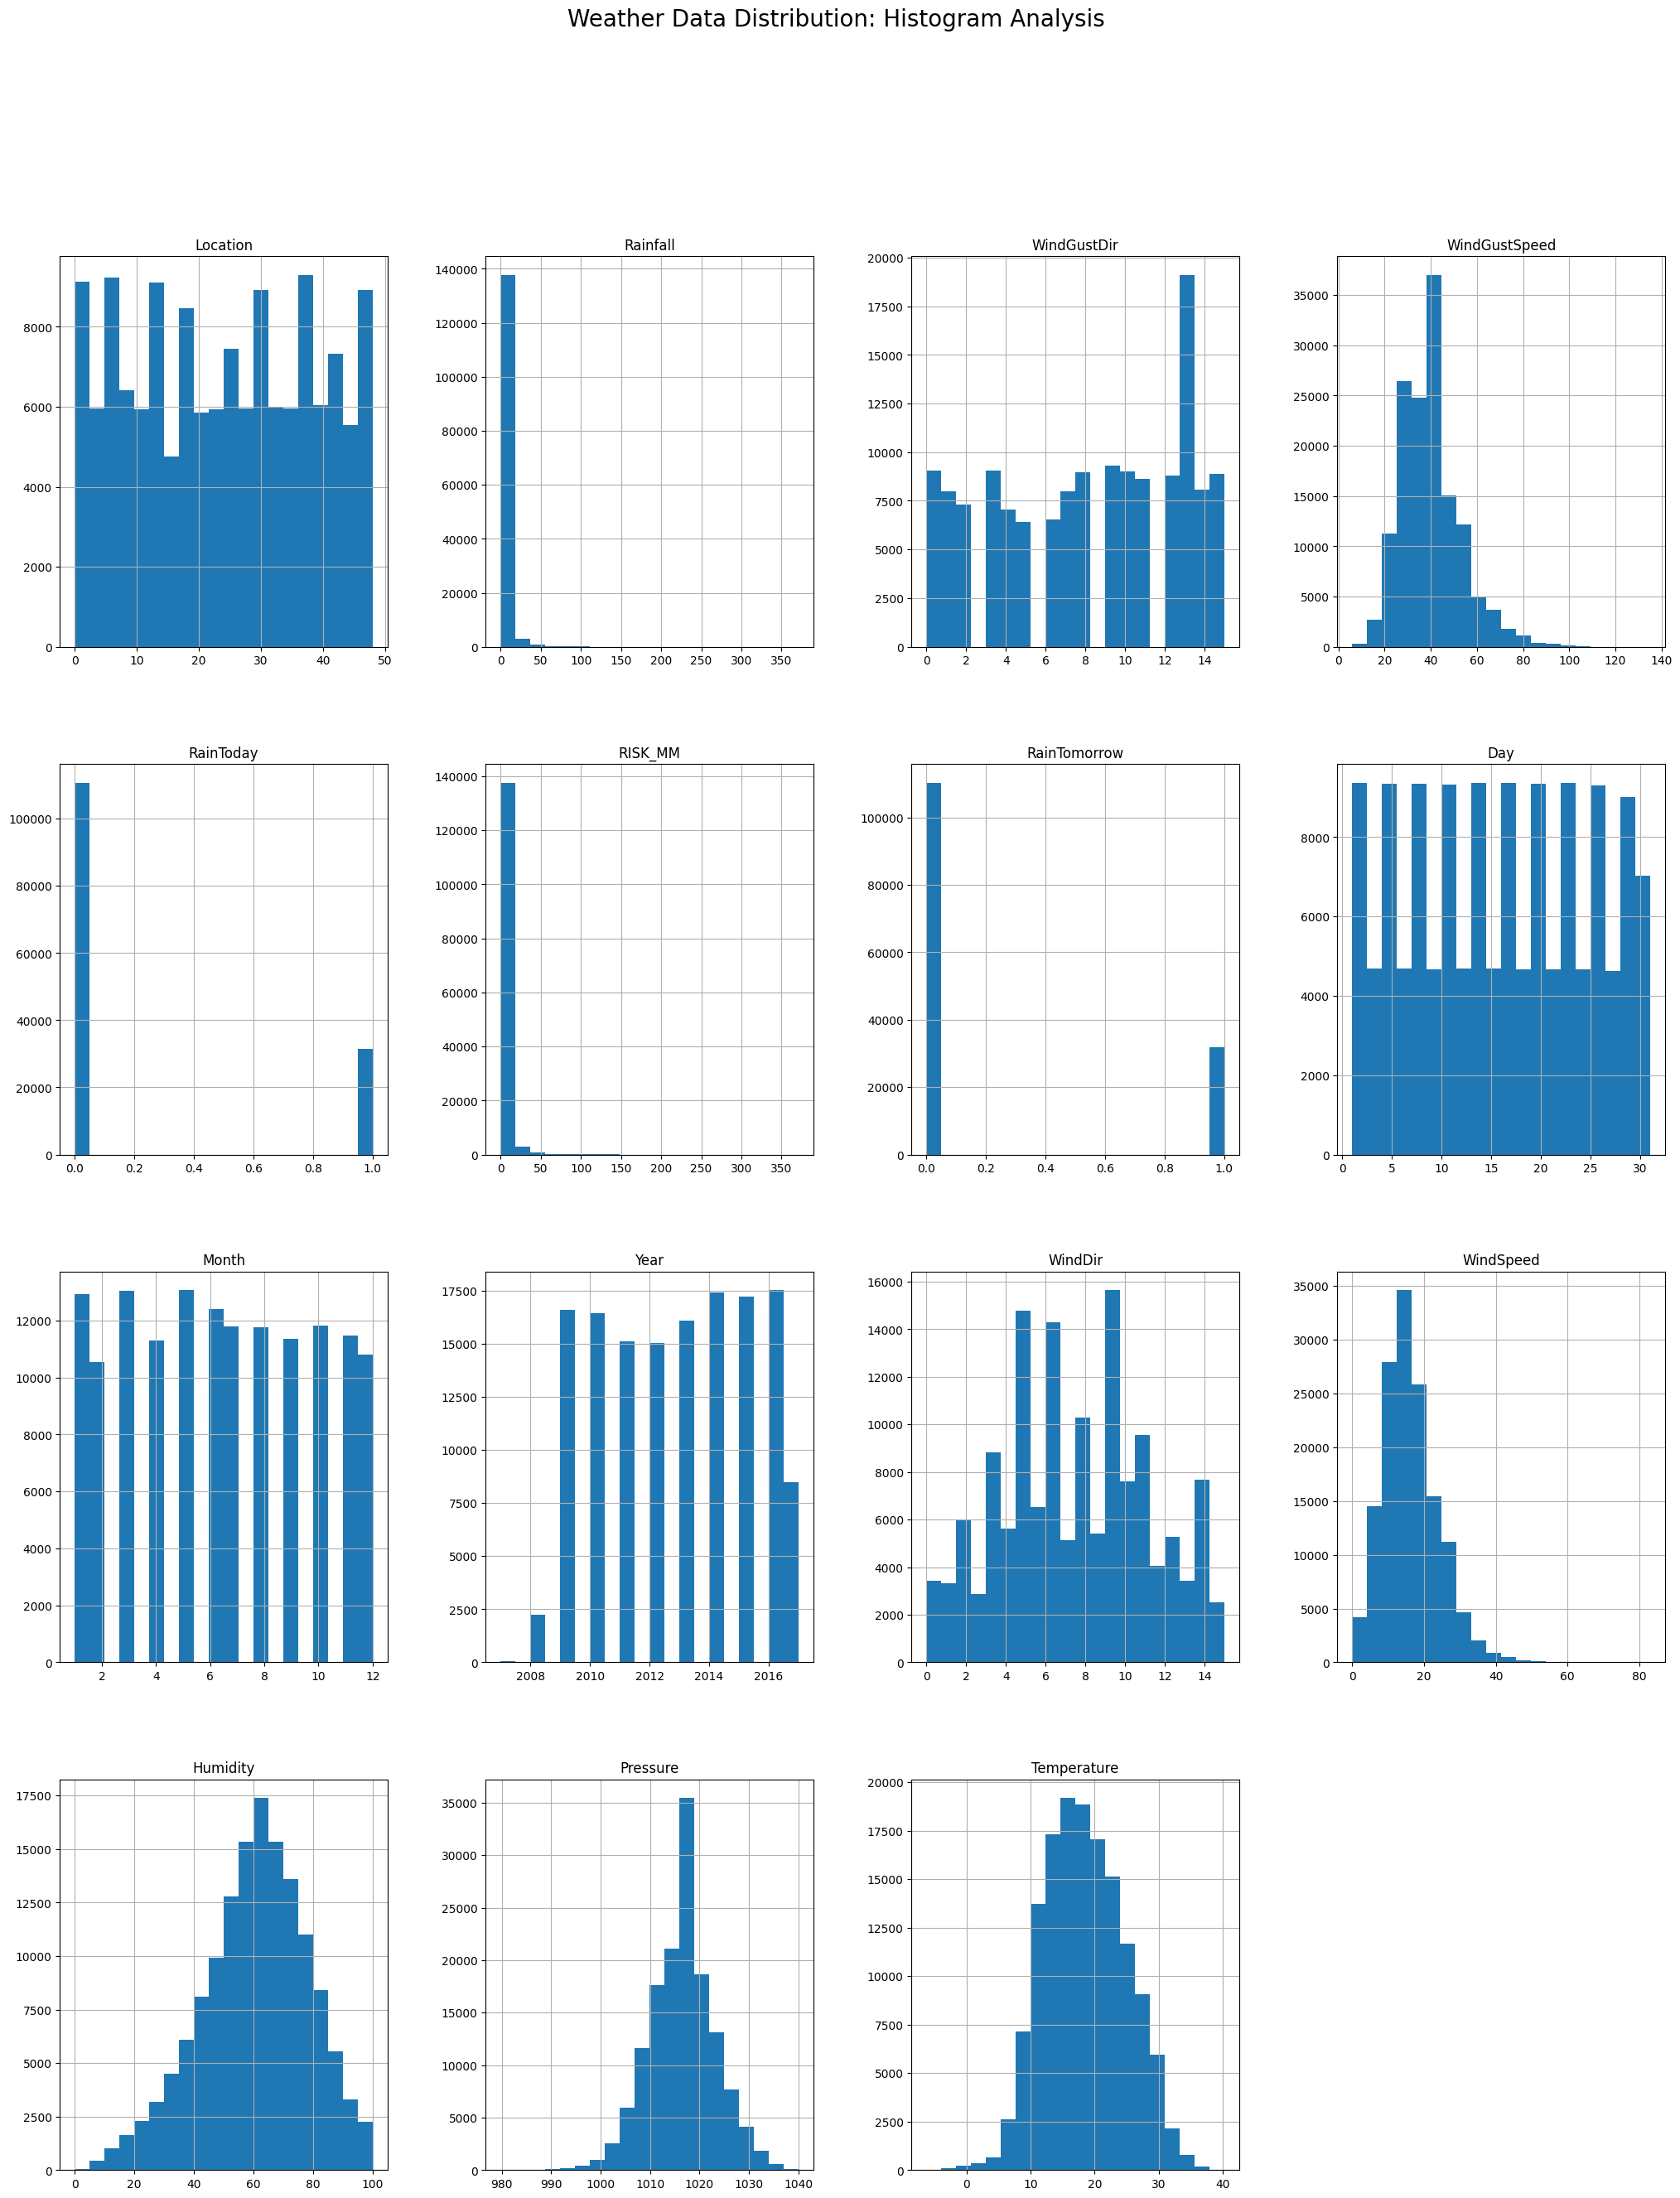

In [37]:
rain.hist(bins=20,figsize=(25,30))
plt.suptitle('Weather Data Distribution: Histogram Analysis', fontsize=20)
plt.show()

In [38]:
# Calculate skewness for each column
skewness = rain.skew()
# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)
# Displays the sorted skewness values
print(sorted_skewness)

Humidity        -0.349724
WindGustDir     -0.222513
Pressure        -0.050043
Year            -0.042629
Day              0.008762
Location         0.015691
Month            0.028958
WindDir          0.050806
Temperature      0.127215
WindSpeed        0.743981
WindGustSpeed    0.918436
RainTomorrow     1.322753
RainToday        1.343357
RISK_MM          9.836902
Rainfall         9.934023
dtype: float64


In [39]:
# # Step 1: Select numeric columns, excluding 'LoanApproved'
# numeric_columns=rain.drop(columns=['RainTomorrow','RISK_MM']).select_dtypes(include=['number'])
# # Step 2: Calculate skewness for numeric columns
# skewness=numeric_columns.skew()
# # Step 3: Identify columns with high skewness (threshold > 1 or < -1)
# highly_skewed_columns=skewness[abs(skewness)>1].index
# # Step 4: Apply log Transformation using np.log1p() for columns with high skewness
# #for col in highly_skewed_columns:
#   # Create a new column with log-transformed values
#   #rain[col]=np.log1p(rain[col])
# # Check transformed columns
# rain.head()

- Skewness is not compulsory here,because of less skewness. The target features have skewness. But, skewness handling is not possible here because those are the targets .

###Removing Unwanted Features

####Based On Correlation

After analyzing the correlations, you can remove:
* One among two highly correlated features (between features and themselves).
* Features with low correlation with the target varialble.

<Axes: >

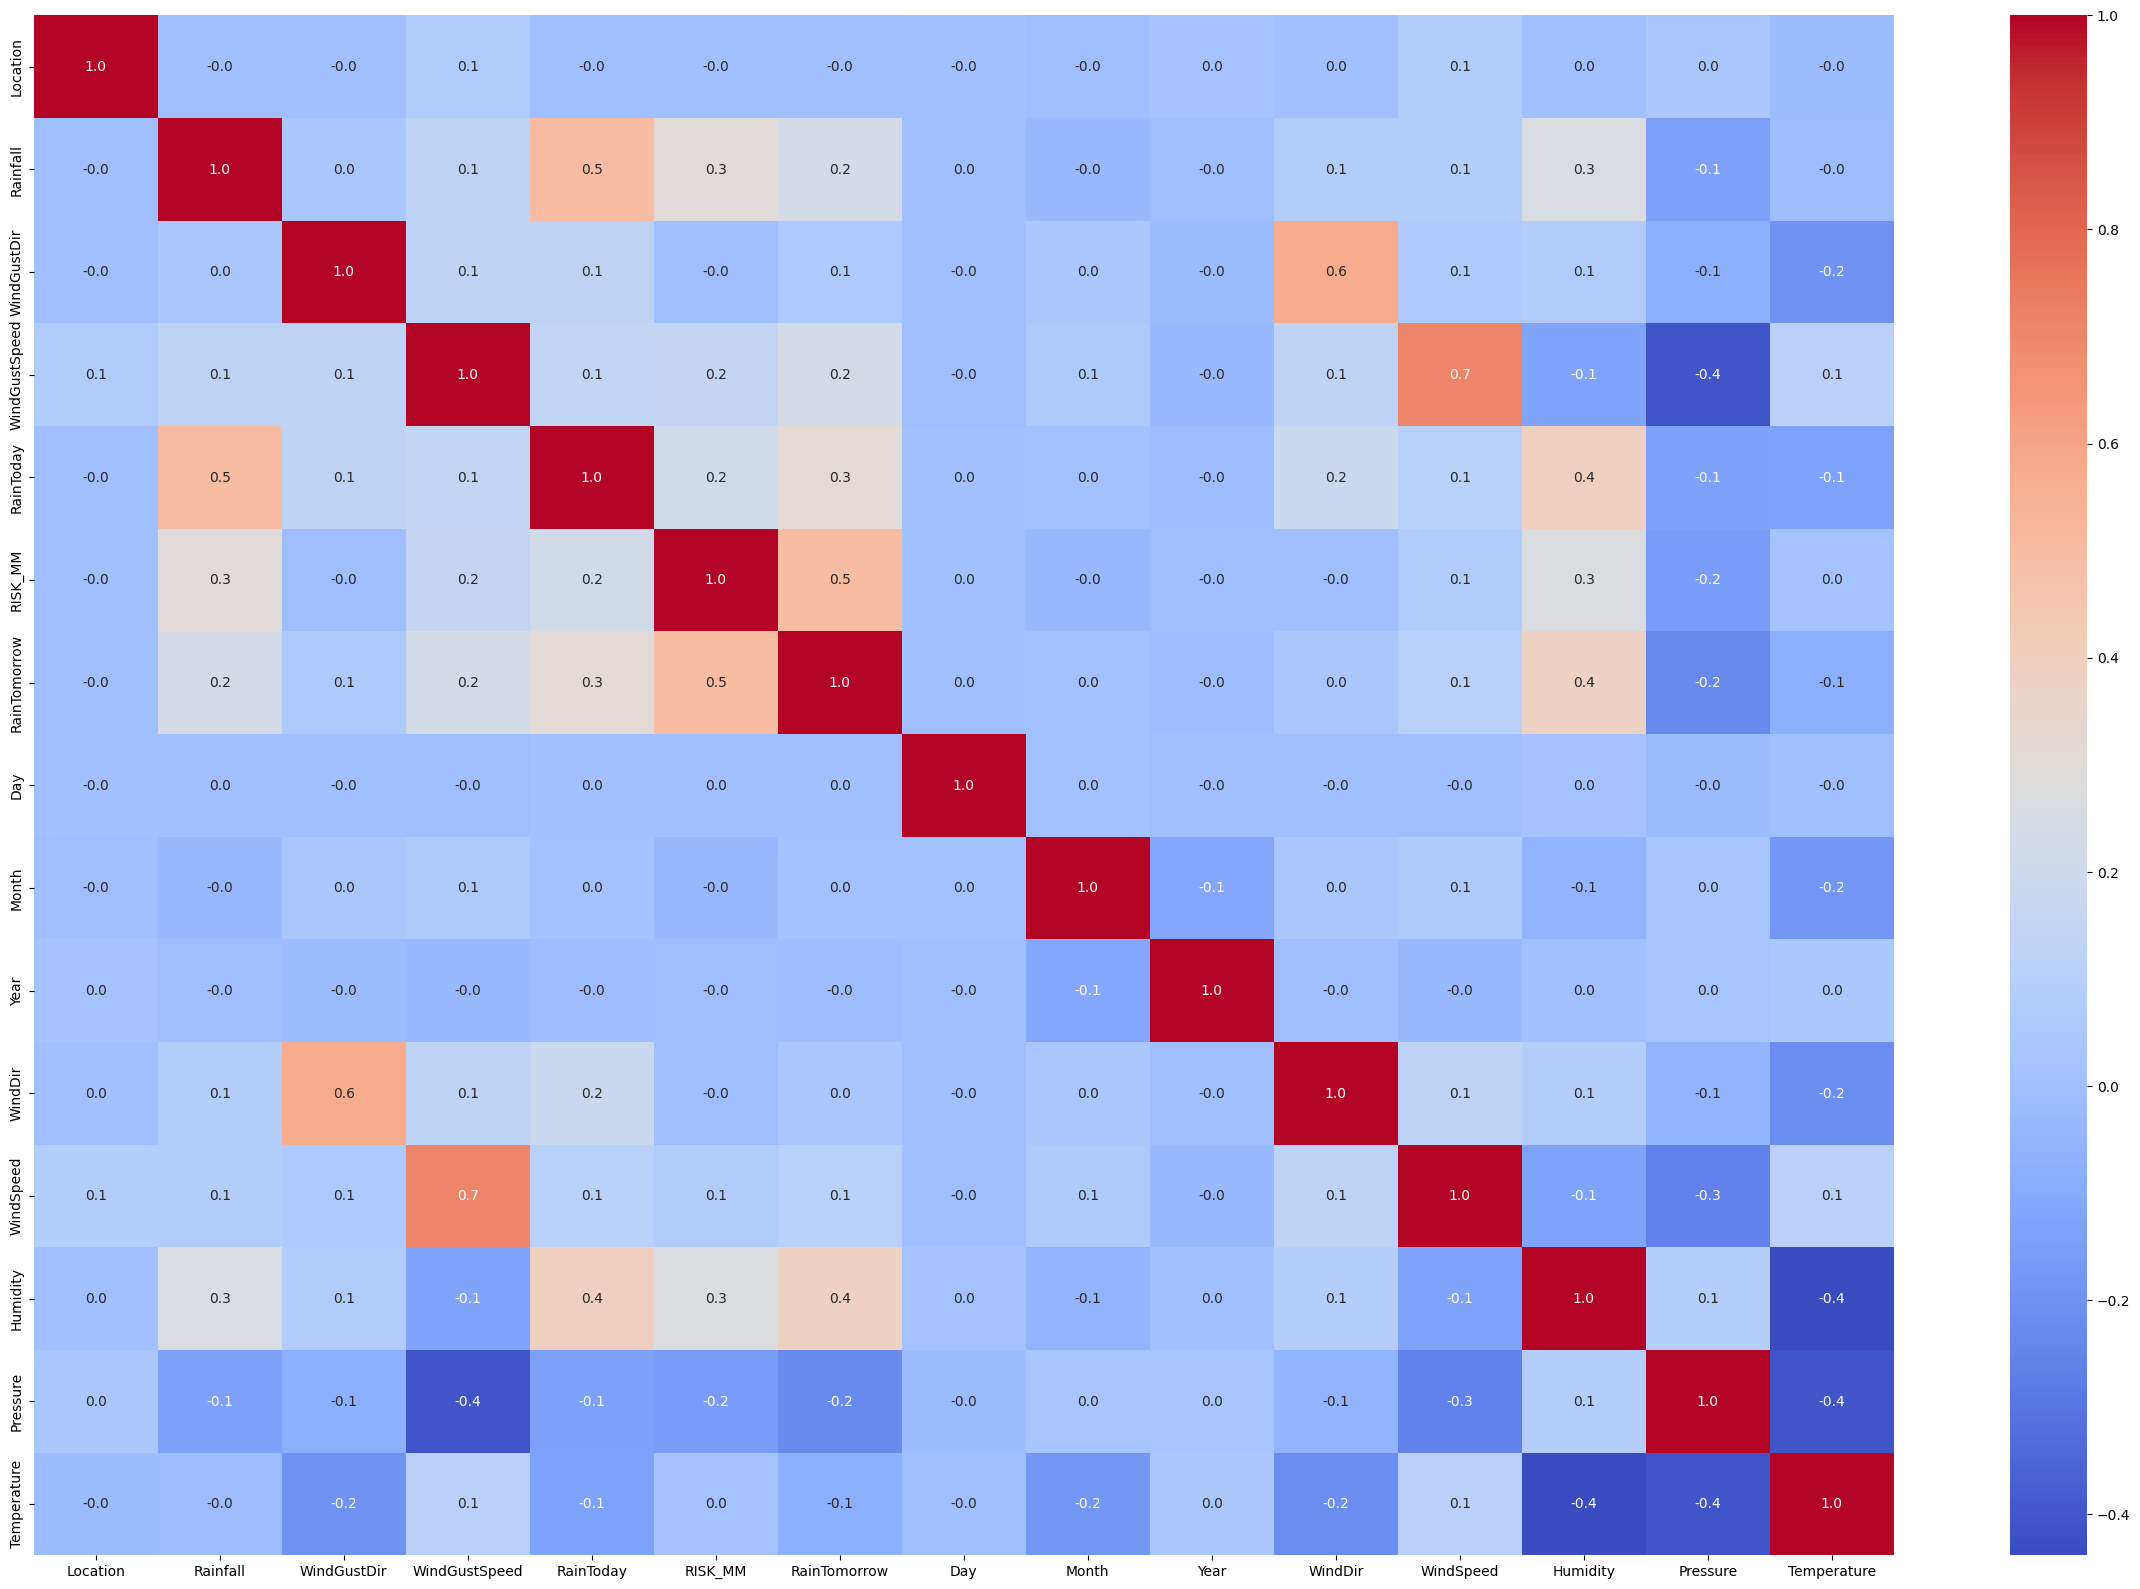

In [40]:
plt.figure(figsize=(30,20))
rain.corr(numeric_only=True)
sns.heatmap(rain.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)

In [41]:
correlation_matrix=rain.corr()
# Set the correlation threshold
threshold=0.5
# Find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # Check if the absolute correlation exceeds the threshold
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
# Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('RainToday', 'Rainfall'), ('RainTomorrow', 'RISK_MM'), ('WindDir', 'WindGustDir'), ('WindSpeed', 'WindGustSpeed')]


- Features with a correlation value of 0.5 or higher (positive or negative)should be considered for removal, as they are highly correlated.

In [42]:
rain.drop('WindDir',axis='columns',inplace=True)
rain.drop('WindGustSpeed',axis='columns',inplace=True)

###Scaling

Standardization and Normalization are two common teachniques used in data preprocessing to scale features

####Standardization:
 * Standardization transforms data to have a mean of 0 and standard deviation of 1. This is done by subtracting the mean of the data and dividing by the standard .
 * Standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data (e.g, linear regression, logistic regression, SVM, etc.). It works well with algorithms that relay on the distance between data points (e.g., k-NN, PCA).

In [43]:
# Create a copy of the original data for comparison
rain_scaled_df = rain.copy()
# Select numeric columns, excluding 'RainTomorrow'
numeric_columns = rain.drop(columns=['RainTomorrow','RISK_MM']).select_dtypes(include=['number']).columns
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply the scaler only to the numeric columns
rain_scaled_df[numeric_columns] = scaler.fit_transform(rain[numeric_columns])
rain_scaled_df.head()

,Location,Rainfall,WindGustDir,RainToday,RISK_MM,RainTomorrow,Day,Month,Year,WindSpeed,Humidity,Pressure,Temperature
0,-1.527004,-0.204920,1.052556,-0.532962,0.0,0,-1.672526,1.633581,-1.872674,0.743450,-0.760661,-1.361724,0.036838
1,-1.527004,-0.276125,1.265582,-0.532962,0.0,0,-1.558865,1.633581,-1.872674,-0.434217,-1.428055,-1.090898,-0.002883
2,-1.527004,-0.276125,1.478609,-0.532962,0.0,0,-1.445205,1.633581,-1.872674,0.808876,-1.455863,-1.248880,0.346666
3,-1.527004,-0.276125,-0.864683,-0.532962,1.0,0,-1.331544,1.633581,-1.872674,-0.826772,-1.650520,-0.188144,0.306945
4,-1.527004,-0.157450,1.052556,-0.532962,0.2,0,-1.217883,1.633581,-1.872674,-0.368791,-0.148884,-1.211265,0.922629


###Handling Outliers

####BoxPlots

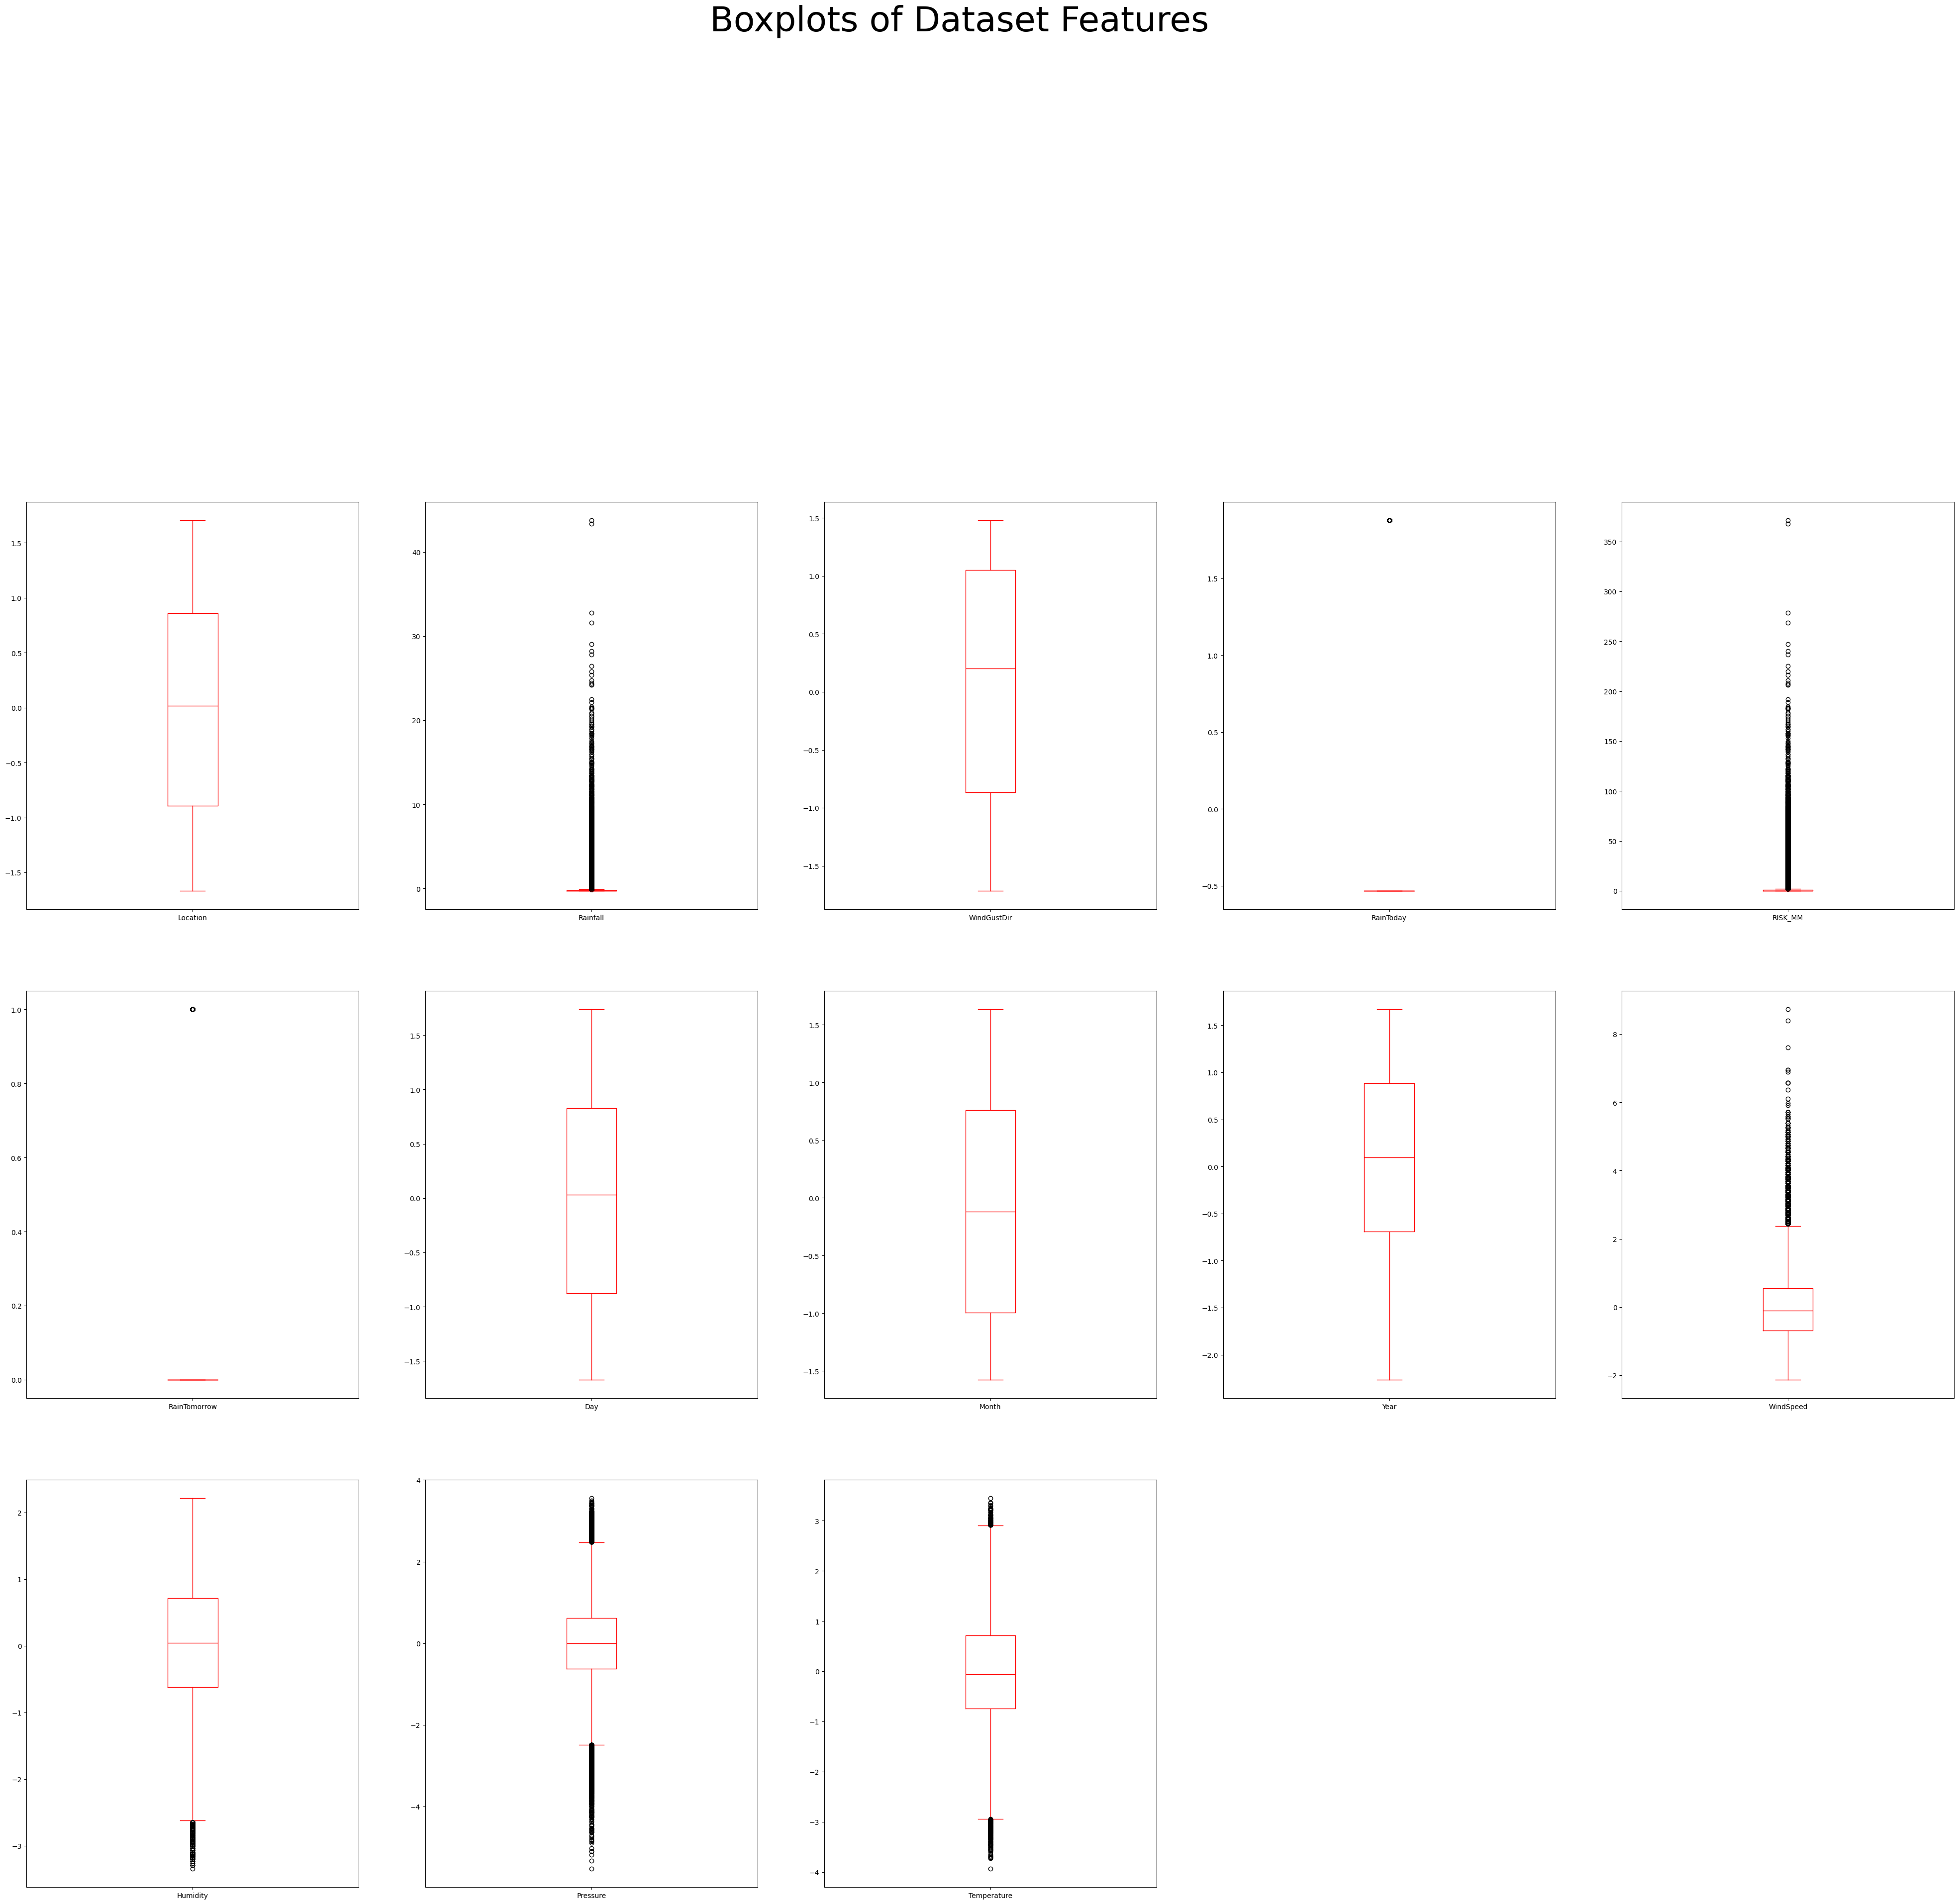

In [45]:
rain_scaled_df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Features',fontsize=50)
plt.show()

In [47]:
# Create a copy of the original data for comparison
rain_df_copy = rain_scaled_df.copy()
def remove_outliers_iqr(df,exclude_columns):
  # Loop through numeric columns
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue # Skip excluded columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df
# Define the columns to exclude
exclude_columns=['RainTomorrow','RISK_MM']
# Remove Outliers
rain_scaled_df=remove_outliers_iqr(rain_scaled_df,exclude_columns)

# Print shapes of data before and after removing outliers
print('Shape of data before removing outliers:',rain_df_copy.shape)
print('Shape of data after removing outliers:',rain_scaled_df.shape)
print('Number of outlier removed:',rain_df_copy.shape[0]-rain_scaled_df.shape[0])

Shape of data before removing outliers: (106493, 13)
Shape of data after removing outliers: (87001, 13)
Number of outlier removed: 19492


##Model Training & Evaluation

In [48]:
x = rain_scaled_df.drop(['RainTomorrow','RISK_MM'],axis=1)
y = rain_scaled_df['RainTomorrow']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
print('Shape of Training Features: ',x_train.shape)
print('Shape of Testing Features: ',x_test.shape)
print('Shape of Training Target: ',y_train.shape)
print('Shape of Testing Target: ',x_test.shape)

Shape of Training Features:  (69600, 11)
Shape of Testing Features:  (17401, 11)
Shape of Training Target:  (69600,)
Shape of Testing Target:  (17401, 11)


###Logistic Regression Model

In [50]:
# Initializing Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

# Predictions
y_pred=logreg.predict(x_test)

In [51]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8717


In [52]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     15066
           1       0.63      0.10      0.18      2335

    accuracy                           0.87     17401
   macro avg       0.75      0.55      0.55     17401
weighted avg       0.84      0.87      0.83     17401



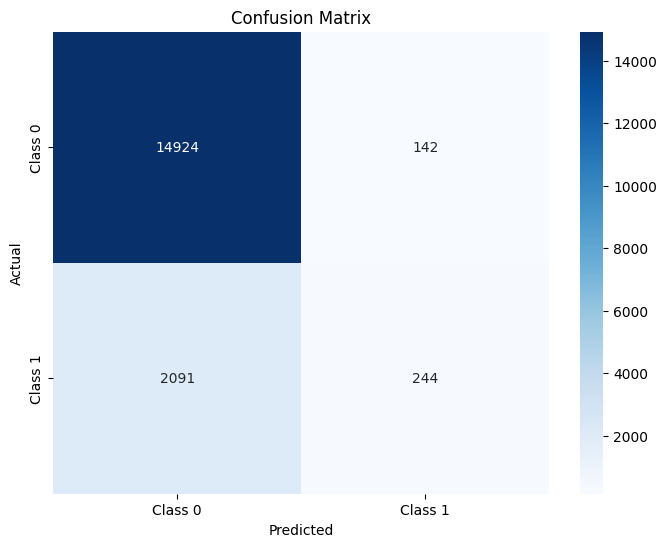

In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Best Classification Model

Training and Evaluating Logistic Regression...
Accuracy: 0.8717

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     15066
           1       0.63      0.10      0.18      2335

    accuracy                           0.87     17401
   macro avg       0.75      0.55      0.55     17401
weighted avg       0.84      0.87      0.83     17401



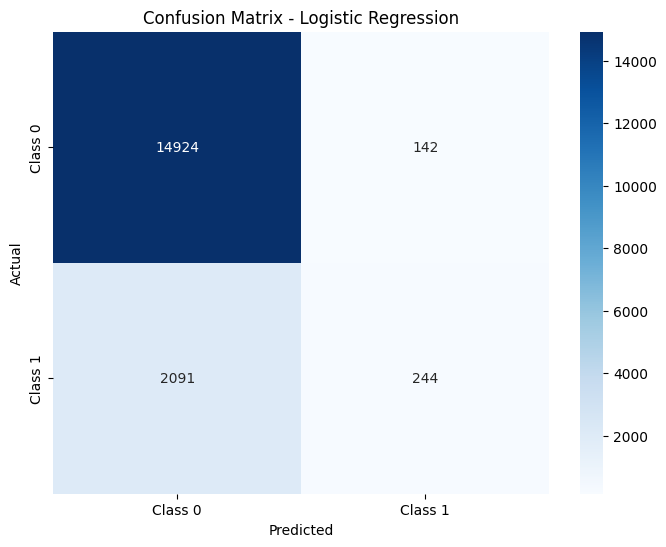

--------------------------------------------------------------------------------
Training and Evaluating Random Forest...
Accuracy: 0.8789

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     15066
           1       0.69      0.18      0.28      2335

    accuracy                           0.88     17401
   macro avg       0.79      0.58      0.61     17401
weighted avg       0.86      0.88      0.85     17401



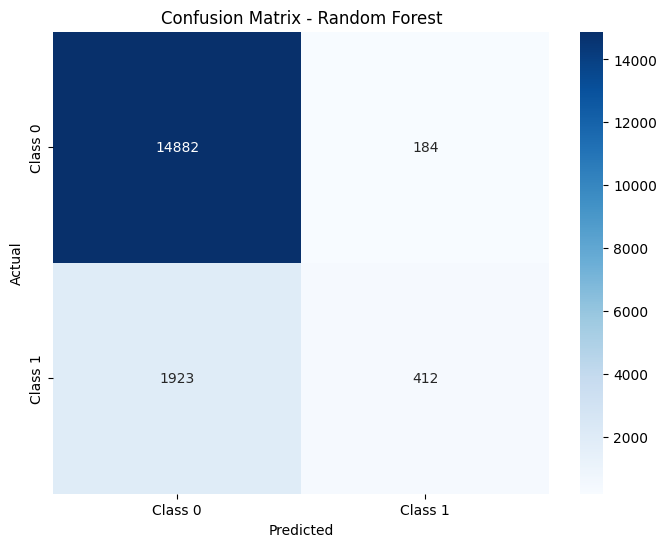

--------------------------------------------------------------------------------
Training and Evaluating Decision Tree...
Accuracy: 0.8121

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     15066
           1       0.31      0.34      0.33      2335

    accuracy                           0.81     17401
   macro avg       0.61      0.61      0.61     17401
weighted avg       0.82      0.81      0.82     17401



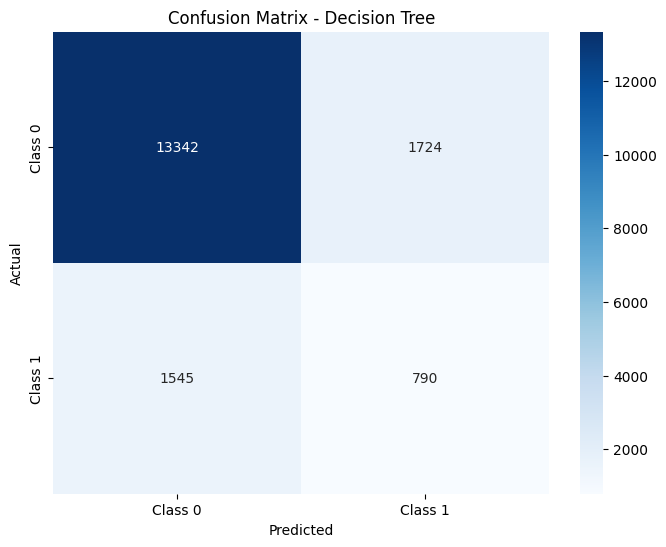

--------------------------------------------------------------------------------
Training and Evaluating K-Nearest Neighbors...
Accuracy: 0.8724

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     15066
           1       0.62      0.13      0.21      2335

    accuracy                           0.87     17401
   macro avg       0.75      0.56      0.57     17401
weighted avg       0.84      0.87      0.83     17401



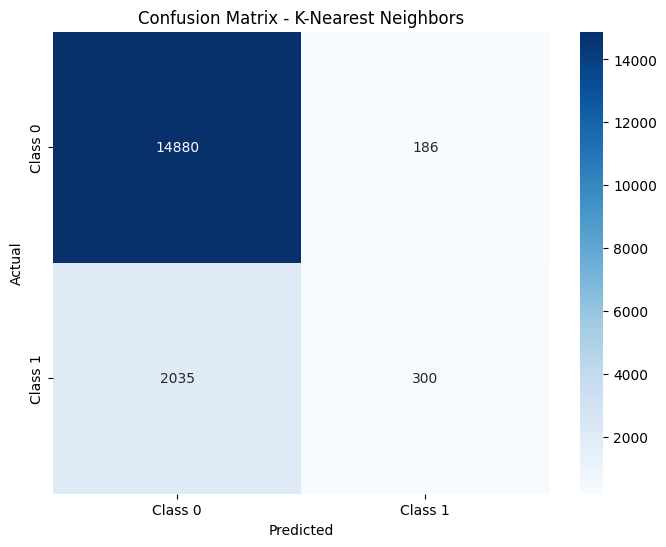

--------------------------------------------------------------------------------
Training and Evaluating Support Vector Machine...
Accuracy: 0.8658

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     15066
           1       0.00      0.00      0.00      2335

    accuracy                           0.87     17401
   macro avg       0.43      0.50      0.46     17401
weighted avg       0.75      0.87      0.80     17401



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


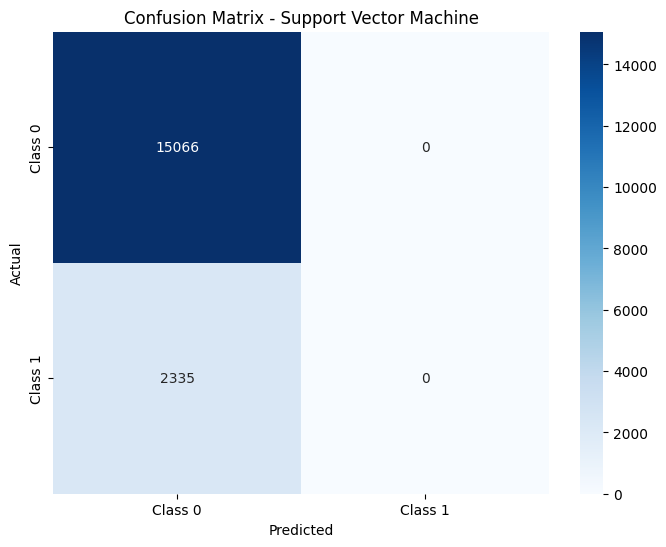

--------------------------------------------------------------------------------
Training and Evaluating Extra Trees...
Accuracy: 0.8783

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     15066
           1       0.73      0.15      0.25      2335

    accuracy                           0.88     17401
   macro avg       0.81      0.57      0.59     17401
weighted avg       0.86      0.88      0.84     17401



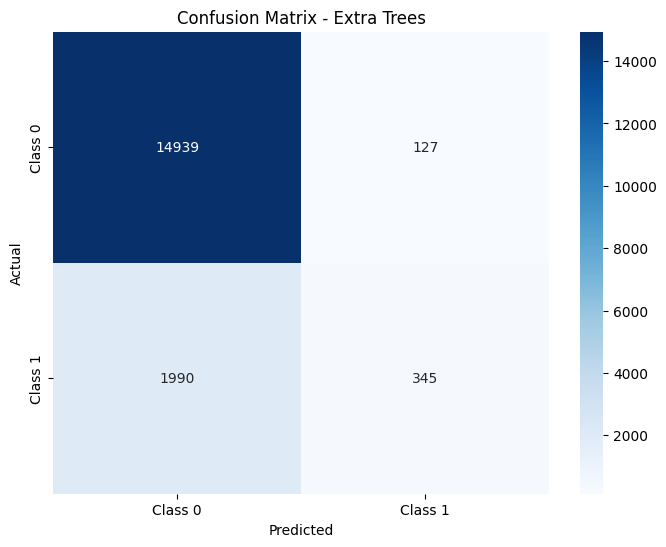

--------------------------------------------------------------------------------


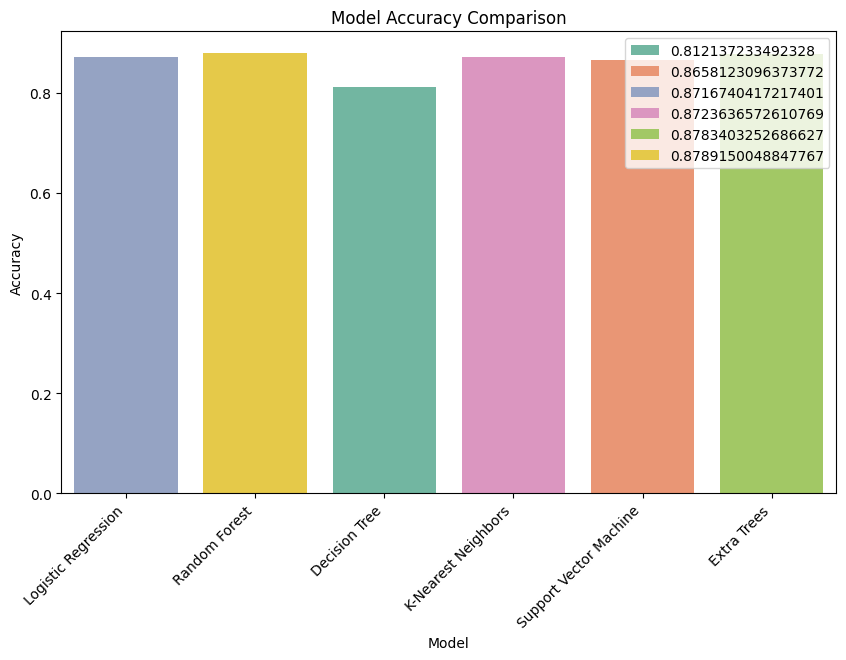

In [54]:
# Define models to evaluate
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Support Vector Machine':SVC(kernel='linear',probability=True),
    'Extra Trees':ExtraTreesClassifier()
}
# Initialize a list to store model names and accuracies
model_accuracies = []

# Loop through models, train, and evaluate
for model_name,model in models.items():
  print(f'Training and Evaluating {model_name}...')

  # Train the model
  model.fit(x_train,y_train)

  # Prediction
  y_pred = model.predict(x_test)

  # Accuracy
  accuracy = accuracy_score(y_test,y_pred)
  model_accuracies.append((model_name,accuracy))
  print(f'Accuracy: {accuracy:.4f}')

  # Classification Report
  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
  plt.title(f'Confusion Matrix - {model_name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Seperate a line for readability between models
  print("-"*80)
# Plotting the accuracies of all models
model_names = [model_name for model_name, _ in model_accuracies]
accuracies = [accuracy for _, accuracy in model_accuracies]

# Create a bar plot for accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies, hue=accuracies, palette='Set2')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

- "RandomForestClassifier" is the highest accuracy in these models.So, the selected model is "RandomForestClassifier" .

###Logistic Regression With Sampling Method


Training and Evaluating Random Forest Classifier with Oversampling (SMOTE)...
Accuracy (oversampling - SMOTE): 0.8660

Classification Report (oversampling - SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     15066
           1       0.50      0.39      0.44      2335

    accuracy                           0.87     17401
   macro avg       0.71      0.67      0.68     17401
weighted avg       0.85      0.87      0.86     17401



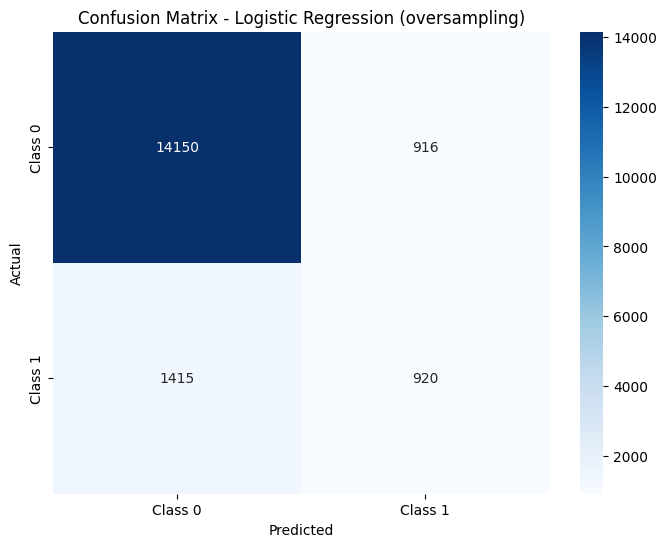

In [57]:
# Apply  oversampling (SMOTE)
model = RandomForestClassifier()
print("\nTraining and Evaluating Random Forest Classifier with Oversampling (SMOTE)...")

smote = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

# Train model on resampled data
model.fit(x_train_resampled, y_train_resampled)

#Predictions
y_pred_oversample = model.predict(x_test)

#Accuracy
accuracy_oversample = accuracy_score(y_test,y_pred_oversample)
print(f'Accuracy (oversampling - SMOTE): {accuracy_oversample:.4f}')

# Classification Report
print("\nClassification Report (oversampling - SMOTE):")
print(classification_report(y_test,y_pred_oversample))

# Confusion Matrix
conf_matrix_oversample= confusion_matrix(y_test,y_pred_oversample)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_oversample,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
plt.title(f'Confusion Matrix - Logistic Regression (oversampling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Pickle File

In [58]:
import pickle

# Train the model (assuming x_train and y_train are already defined)
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Save the trained model using pickle
with open('Rain Prediction(RFC) model.pkl','wb') as file:
  pickle.dump(model,file)
  print("Model saved to 'Rain Prediction(RFC) model.pkl'.")

Model saved to 'Rain Prediction(RFC) model.pkl'.


##**Project Report: Weather Prediction Using Machine Learning**

---

**Project Title:**
Rainfall Prediction Using Machine Learning Classifiers

🔍 **Problem Statement**

- The goal of this project is to predict whether it will rain tomorrow in a given Australian location based on historical weather data. The target variable is RainTomorrow, a binary classification problem where:

- 1 → It will rain tomorrow

- 0 → It will not rain tomorrow

- This problem has real-world implications for sectors like agriculture, transportation, and public safety.

🎯 **Objective / Goal**

- Explore and clean the weather dataset.

- Perform Exploratory Data Analysis (EDA).

- Build and evaluate multiple classification models to predict rainfall for the next day.

- Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique).

- Compare model performance and save the best model for deployment.

📦 **Dataset Description**

- The dataset used is the weatherAUS.csv file which contains daily weather observations from various locations in Australia.

- Key features include:

   - Date: Observation date

   - Location: Site of the weather station

   - MinTemp, MaxTemp, Rainfall, WindSpeed9am, WindSpeed3pm

   - Humidity9am, Humidity3pm, Pressure9am, Pressure3pm

   - RainToday, RainTomorrow (target variable)

📊 **Exploratory Data Analysis (EDA)**

🧱 **Class Distribution**

- RainTomorrow = 0: ~77.6%

- RainTomorrow = 1: ~22.4%

- The dataset is imbalanced, requiring balancing techniques like SMOTE.

📈 **Inference from Visualizations**

- Barplot: Average rainfall is significantly higher on days before it rains tomorrow (RainTomorrow=1) compared to when it does not.

- Pie Chart: Shows the class imbalance of the target variable, highlighting the need for resampling.

⚙️ **Machine Learning Models Applied**

- The following classifiers were trained and tested:

- Logistic Regression

- Decision Tree Classifier

- Random Forest Classifier

- K-Nearest Neighbors (K=11)

- Support Vector Machine (Linear Kernel)

- Extra Trees Classifier

- All models were evaluated using:

- Accuracy Score

- Classification Report (Precision, Recall, F1-Score)

- Confusion Matrix

- Final Comparison Bar Plot

⚖️ **Handling Imbalanced Data**

- Technique Used: SMOTE (Synthetic Minority Oversampling Technique)

- Oversampling was applied to the training set.

- Model was retrained (Logistic Regression shown here) and compared against the original.

🧠 **Best Performing Model**

- The models were evaluated based on accuracy and classification reports. The top-performing model was selected and saved using pickle for future use. DecisionTreeClassifier is the best model in this project.

🧪 **After SMOTE**

- Accuracy decreased after applying SMOTE

📉 **Performance Visualization**

- Final model performance was visualized using a seaborn bar plot comparing all model's accuracies.

- Confusion matrices were plotted for each model to show prediction distribution across classes.

📁 **Files Included**

- Dataset: https://www.kaggle.com/datasets/gauravduttakiit/weather-in-aus

- Python Code: Model training, EDA, SMOTE, visualization

- Rain Prediction(RFC) model.pkl: Trained and saved model

📌 **Conclusion**

- Weather prediction using classification models is feasible with historical data.

- Handling imbalanced data is crucial for improving performance, especially recall.

- Decision Trees and Random Forests performed well. Random Forest have the highest accuracy, but after SMOTE, this model's accuracy was decreased . So, the selected model is  **RandomForestClassifier** without resampling (SMOTE) .

✅ **Future Work**

- Hyperparameter tuning for all models.

- Try ensemble techniques like XGBoost or LightGBM.

- Use time-based train-test split for temporal consistency.

---
**Prepared by:**
Swalha Sakeer

